# Libraries and Data

In [ ]:
%cd /content/drive/MyDrive/Business analyst course/Business Analyst course-20230301T202844Z-001/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business analyst course/Business Analyst course-20230301T202844Z-001/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [41]:
#Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [42]:
#Load data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution


<Axes: ylabel='Density'>

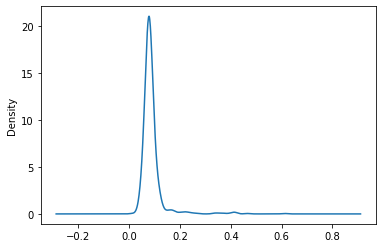

In [43]:
#Density plot of chlorides
df.chlorides.plot.density()

In [44]:
#Check the percent of observations within X 1 standard deviation
df.loc[(df.chlorides <= df.chlorides.mean() + 1*df.chlorides.std()) & (df.chlorides >= df.chlorides.mean() - 1*df.chlorides.std()) ].chlorides.count()/df.chlorides.count()


0.9480925578486554

Conclusion: the distribution of chlorides does not seem to be normal

In [45]:

#The share of observations within 3 standard deviation of alcohol.
df.loc[(df.alcohol <= df.alcohol.mean() + 3*df.alcohol.std()) & (df.alcohol >= df.alcohol.mean() - 3*df.alcohol.std()) ].alcohol.count()/df.alcohol.count()


0.9949968730456535

<Axes: ylabel='Density'>

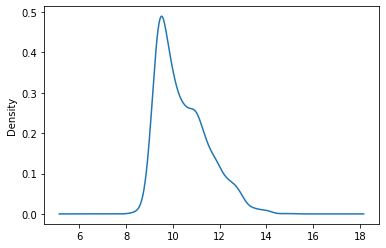

In [46]:
#Plot alcohol distribution
df.alcohol.plot.density()

In [ ]:
#Shapiro-Wilks test for normality (chlorides)

stats, p = st.shapiro(df.chlorides)
print(p)

#condition
if p > 0.05:
  #if yes
    print("Sample looks normal/Gaussian, failed to reject HO")
  #if not
else:
  print("Sample does not normal/Gaussian, reject HO")


0.0
Sample does not normal/Gaussian, reject HO


In [ ]:
#Shapiro-Wilks test for normality (sulphates)

stats, p = st.shapiro(df.sulphates)
print(p)

#condition
if p > 0.05:
  print ("Sample looks normal, failed to reject HO")

else:
  print ("Sample does not look normal, reject HO")


5.821617678881608e-38
Sample does not look normal, reject HO


# Standard Error

In [ ]:
#Using a function
#Standard deviations divided by square root of observations
st.sem(df.alcohol)


0.026650018979018173

In [ ]:
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

In [ ]:
#Standard Error of PH
st.sem(df.pH)


0.0038608683325203784

In [ ]:
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784

# Confidence Interval of the Mean of Citric Acid


In [36]:
print(df[["citric acid"]].mean())
st.norm.interval(confidence = 0.95, loc = df[["citric acid"]].mean(), scale = st.sem(df[["citric acid"]]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

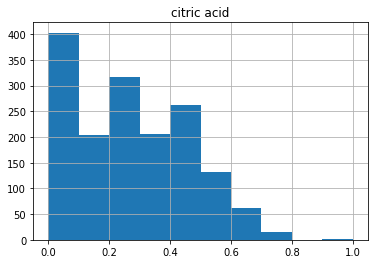

In [37]:
#Histogram
df[["citric acid"]].hist()


In [38]:
#Confidence interval of Density mean

print(df.density.mean())
st.norm.interval(confidence = 0.95, loc = df.density.mean(), scale = st.sem(df.density))


0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

<Axes: >

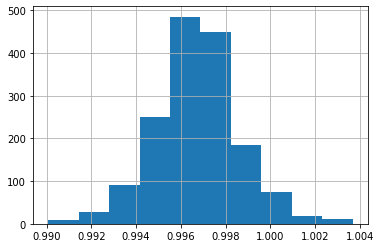

In [ ]:
df.density.hist()

# T-Test


In [ ]:
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#subset
salary_uk = data.loc[data.Country == "United Kingdom"].Salary
salary_uk

0       100000.0
11       32500.0
12       30000.0
17       32500.0
18       43750.0
          ...   
5575     53750.0
5577     45000.0
5580     43750.0
5589     88750.0
5592     33750.0
Name: Salary, Length: 1023, dtype: float64

In [ ]:
salary_de = data.loc[data.Country == "Germany"].Salary
salary_de

3       64516.129030
7       53763.440860
9       83870.967740
25      10752.688170
43      59139.784950
            ...     
5570    60215.053760
5571    48387.096770
5574    69892.473120
5578     8602.150538
5579    41935.483870
Name: Salary, Length: 757, dtype: float64

In [ ]:
#T-test
stat, p = st.ttest_ind(a = salary_uk, b = salary_de)
print(p)

if p > 0.05:
  print("Both countries have similar salaries (fail to reject HO")
else:
  print("There is a difference (reject HO)")

0.026389999555203502
There is a difference (reject HO)


In [ ]:
#T-test in experience between India and United States

#subset
us_experience = data.loc[data.Country == "United States"].YearsCodedJob
in_experience = data.loc[data.Country == "India"].YearsCodedJob

In [ ]:
stat, p = st.ttest_ind(a = us_experience, b = in_experience)
print(p)
if p > 0.05:
  print("Groups are similar (fail to reject HO")
else:
  print("Groups are different (reject HO)")

5.225676347614714e-58
Groups are different (reject HO)


<Axes: >

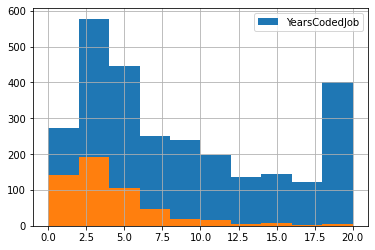

In [ ]:
#histograms
us_experience.hist(legend=True)
in_experience.hist()


# Chi-square Test

In [ ]:
#cross-tab

tab = pd.crosstab(index = data.Country, columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [ ]:
# chi-square test
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)

#p-value is very low so we reject HO.

3.321120877301216e-16


In [ ]:
# chi-square test between company size and hobbies

tab2 = pd.crosstab(index = data.Hobby, columns = data.CompanySizeNumber)

tab2


CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [ ]:
chi2, p, dof, exp = st.chi2_contingency(tab2)
print(p)
#p-value is low so there is a strong relationship between two variables and we reject HO.

0.025708455559671013
